In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from math import sqrt,cos,acos,pi,exp,sin,atan2,log
from numpy import arange,mean,asarray,isnan,isinf
import pickle
from scipy import stats

import csv
import sys
import pandas as pd
import os

fset = 0 # 0 = open data, 1-7 = fake datasets, 8 = High E far sideband, 9 = Low BDT far sideband
cutMode = 0 # 0 = Final Selection, 1 = Kin Cut Sample, 2 = High E, 3 = Low BDT
if fset==8: cutMode = 2
if fset==9: cutMode = 3
    
savedir = {0:'FinalSelection',1:'KinCut',2:'HighE',3:'LowBDT'}[cutMode]

lowEpatch = False#True if fset in [0,5,8,9] else False
vtxCut    = 5

C1_POT = 1.558e+20 + 1.129e+17 + 1.869e+19
D2_POT = 1.63e+20 + 2.964e+19 + 1.239e+19
E1_POT = 5.923e+19
F1_POT = 4.3e+19
G1_POT = 1.701e+20 + 2.97e+19 + 1.524e+17


if fset==0: 
    DAT_POT1 = 4.403e19
    DAT_POT3 = 8.786e+18
elif fset==1: 
    DAT_POT1  = 1.9710529814e+20
    DAT_POT3  = 2.86144913724e+20
elif fset==2: 
    DAT_POT1 = 3.617e+20
    DAT_POT3 = 3.841e+20
elif fset==3: 
    DAT_POT1 = 3.840e+20
    DAT_POT3 = 3.968e+20
elif fset==4: 
    DAT_POT1 = 3.86746111569e+20
    DAT_POT3 = 3.92745929386e+20
elif fset==5: 
    DAT_POT1 = 7.0219630122e+20
    DAT_POT3 = 0
elif(fset==8):
    DAT_POT1 = C1_POT
    DAT_POT2 = D2_POT+E1_POT
    DAT_POT3 = F1_POT+G1_POT
elif(fset==9):
    DAT_POT1 = C1_POT
    DAT_POT2 = D2_POT+E1_POT
    DAT_POT3 = G1_POT

if cutMode==0 and fset==0:
    DAT_POT1 = C1_POT
    DAT_POT2 = E1_POT+D2_POT
    DAT_POT3 = F1_POT+G1_POT
    
DATA_POT_TOT = DAT_POT1 + DAT_POT2 + DAT_POT3


print(DAT_POT1,DAT_POT2,DAT_POT3)
print(DATA_POT_TOT)


1.746029e+20 2.6426e+20 2.429524e+20
6.818153e+20


In [2]:
tag='3March2021_vA_fullLowE_withPi0Sample_newShowerCalib'

filetaglist = {1:['ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0'],
               2:['overlay','overlay_lowE','intrinsics','intrinsics_lowE'],
               3:['ext','overlay','overlay_lowE','intrinsics','intrinsics_lowE','ncpi0','ccpi0']}

df = {1:{},2:{},3:{}}

psavedir = 'Parquets/'+tag+'/'

for r in [1,2,3]:
    print('\n\n','#'*20,'RUN',r,'#'*20,'\n')

    for filetag in filetaglist[r]:
        if not lowEpatch and 'lowE' in filetag: continue
        print('Sample:',filetag)
        pstring = 'SelectionMode%i_%s_run%i.parquet.gzip'%(cutMode,filetag,r)
        df[r][filetag] = pd.read_parquet(psavedir+pstring)



 #################### RUN 1 #################### 

Sample: ext
Sample: overlay
Sample: intrinsics
Sample: ncpi0
Sample: ccpi0


 #################### RUN 2 #################### 

Sample: overlay
Sample: intrinsics


 #################### RUN 3 #################### 

Sample: ext
Sample: overlay
Sample: intrinsics
Sample: ncpi0
Sample: ccpi0


In [3]:
    

varb_names = ['Enu_1e1p','Eta','PT_1e1p','AlphaT_1e1p',
              'SphB_1e1p','PzEnu_1e1p','ChargeNearTrunk',
              'Q0_1e1p','Q3_1e1p','Thetas','Phis','PTRat_1e1p',
              'Proton_ThetaReco','Proton_PhiReco',
              'MinShrFrac','MaxShrFrac',
              'BjXB_1e1p','BjYB_1e1p','Proton_Edep',
              'Electron_Edep',
              'Lepton_ThetaReco','Lepton_PhiReco',
              'OpenAng','Xreco','Yreco','Zreco',
              'sigprob','MPIDY_muon',
              'MPIDY_proton','MPIDY_eminus','shower_fraction',
              'Shower_Consistency',
              'EnuQE_lepton','EnuQE_proton','EnuTrue']

var_labels = [r'$E_\nu^{Range}$ [MeV]',r'$\eta$',r'Event $p_T$ [MeV]',r'$\alpha_T$',
              'QE Consistency',r'$p_z - E_\nu$ [MeV]','Charge Near Trunk',
              r'$Q_0$ [MeV]',r'$Q_3$ [MeV]',r'$\theta_e + \theta_p$',r'$|\phi_e - \phi_p|$',r'Event $p_T/p$',
              r'$\theta_p$',r'$\phi_p$',
              'Minimum Shower Fraction','Maximum Shower Fraction',
              'Bjorken X (Nucleon Rest Frame)','Bjorken Y (Nucleon Rest Frame)',r'$E_p$ [MeV]',
              r'$E_e$ [MeV]',
              r'$\theta_e$',r'$\phi_e$',
              'Opening Angle',r'$X_{reco}$',r'$Y_{reco}$','$Z_{reco}$',
              '1e1p BDT Score','Muon MPID Score (Y plane)',
              'Proton MPID Score (Y plane)','Electron MPID Score (Y plane)','Shower Fraction',
              'Shower Energy Consistency',
              r'$E_\nu^{Q-e}$',r'$E_\nu^{QE-p}$',r'$E_\nu^{True}$ [MeV]']

ranges = [ (0,1200),(0,0.6),(0,800),(0,np.pi),(0,5000),(-800,300),
           (0,800),(100,700),(0,1400),(0,2*np.pi),(0,2*np.pi),
           (0,1),(0,np.pi),(-np.pi,np.pi),(-1,1),(-1,1),(0,3),
           (0,1),(60,500),(35,1200),(0,np.pi),
           (-np.pi,np.pi),(0,np.pi),(0,256),(-117,117),(0,1036),
           (0.7,1),(0,1),(0,1),(0,1),(0,3),(0,5),
           (0,1200),(0,1200),(0,1200)]

varlabel_dict = {name:label for name,label in zip(varb_names,var_labels)}
range_dict = {name:rnge for name,rnge in zip(varb_names,ranges)}

    

In [4]:
# HELPER FUNCTIONS

def getSysErrors(nbins,varName,POT1,POT3):
    try:
        det_sys_m_1 = np.loadtxt('DetectorSystematics/covMatrixv0/detsys_'+varName+'_run1_cov.csv',delimiter=',')
        det_sys_m_3 = np.loadtxt('DetectorSystematics/covMatrixv0/detsys_'+varName+'_run3_cov.csv',delimiter=',')
        det_sys_m = (det_sys_m_1*POT1 + det_sys_m_3*POT3)/(POT1+POT3)
    except:
        det_sys_m = np.zeros((nbins,nbins))
    try:
        rwt_sys_m = np.loadtxt('RwghtCovMatrices/FinalSelection/frac_covar_rewgt_final__'+varName+'.txt')
    except:
        rwt_sys_m = np.zeros((nbins,nbins))
    rwt_sys_m = np.where(np.isnan(rwt_sys_m),0,rwt_sys_m)
    det_sys_m = np.where(np.isnan(det_sys_m),0,det_sys_m)
    return rwt_sys_m,det_sys_m

def MakeBDTcut(idf,sigcut,mode,nBDTs):
    
    # Conglemerate BDT scores and weights based on strategy 
    
    bdtweight = np.zeros(idf.shape[0])
    sigprobmax = np.zeros(idf.shape[0]) 
    sigprobavg = np.zeros(idf.shape[0])
    sigprobmedian = np.zeros(idf.shape[0])
    sigproblist = np.zeros((idf.shape[0],nBDTs))
    notintrain = np.zeros((idf.shape[0],nBDTs),dtype=bool)
    numnottrain = np.zeros(idf.shape[0])
    for b in range(nBDTs):
        sp = idf['sigprob%i'%b]
        tvw = idf['tvweight%i'%b]
        sigprobmax = np.where(np.logical_and(tvw>0,sp>sigprobmax),sp,sigprobmax) # cut on the maximum non-train score in ensemble
        if mode == 'fracweight': 
            bdtweight += np.where(sp>sigcut,tvw/float(nBDTs),0)
        sigprobavg += np.where(tvw>0.1,sp,0)
        numnottrain += np.where(tvw>0.1,1,0)
        sigproblist[:,b] = sp
        notintrain[:,b] = tvw > 0.1
    sigprobavg /= np.where(numnottrain>0,numnottrain,1)
    for i,(tlist,siglist) in enumerate(zip(notintrain,sigproblist)):
        splist = siglist[tlist]
        if splist.size!=0: sigprobmedian[i] = np.median(splist)
        else: sigprobmedian[i] = 0
        
    idf['sigprobavg'] = sigprobavg
    idf['sigprobmedian'] = sigprobmedian
    idf['sigprobmax'] = sigprobmax
    
    if mode == 'avgscore':
        idf['sigprob'] = idf['sigprobavg']
        bdtweight = np.where(sigprobavg>sigcut,1,0)
    elif mode == 'medianscore':
        idf['sigprob'] = idf['sigprobmedian']
        bdtweight = np.where(sigprobmedian>sigcut,1,0)
    elif mode == 'fracweight':
        idf['sigprob'] = idf['sigprobmax']
    
    idf['bdtweight'] = bdtweight
    
    # Drop duplicates
    
    idf.sort_values(by=['run','subrun','event','sigprob'],ascending=False,inplace=True)
    idf.drop_duplicates(subset=['run','subrun','event'],inplace=True)
    
def SaveTextFile(idf,run,filetag,sigcut,mode,tsavedir):
    nBDTs = int(idf['nBDTs'][0])
    MakeBDTcut(idf,sigcut,mode,nBDTs)
    idf.query('sigprob > @sigcut',inplace=True)
    savestr = 'FinalSelection%i_%s_run%i.txt'%(cutMode,filetag,run)
    idf.to_csv(tsavedir+savestr,index=None,sep=' ')
    
    

In [5]:
bdtmode = 'fracweight'
tsavedir = 'TextFiles/'+tag+'/'
try: os.mkdir(tsavedir)
except OSError as error: print(error)
for r in [1,2,3]:
    for filetag in filetaglist[r]:
        if not lowEpatch and 'lowE' in filetag: continue
        dfc = df[r][filetag].copy()
        SaveTextFile(dfc,r,filetag,0.4,bdtmode,tsavedir)

[Errno 17] File exists: 'TextFiles/3March2021_vA_fullLowE_withPi0Sample_newShowerCalib/'


/home/nwkamp/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nwkamp/.local/lib/python2.7/site-packages/ipykernel_launcher.py:248: RuntimeWarning: invalid value encountered in divide


<Figure size 432x288 with 0 Axes>

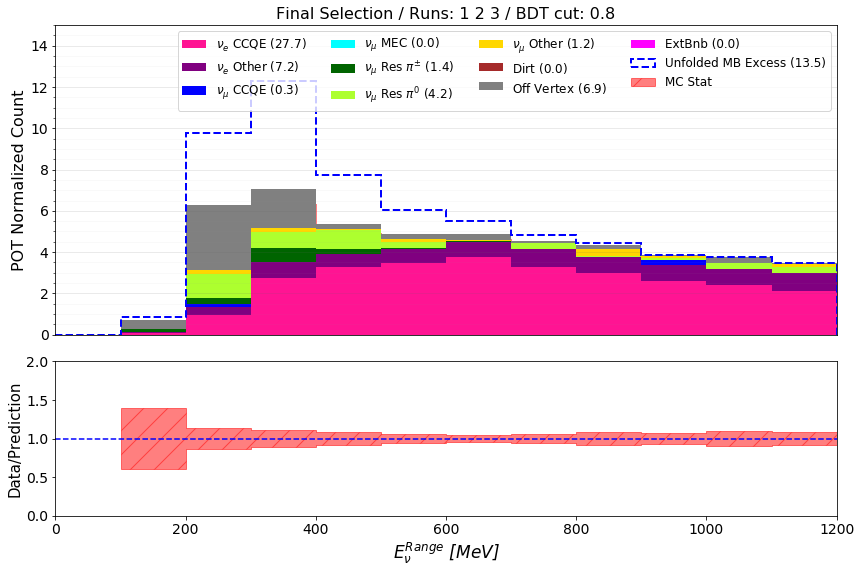

<Figure size 432x288 with 0 Axes>

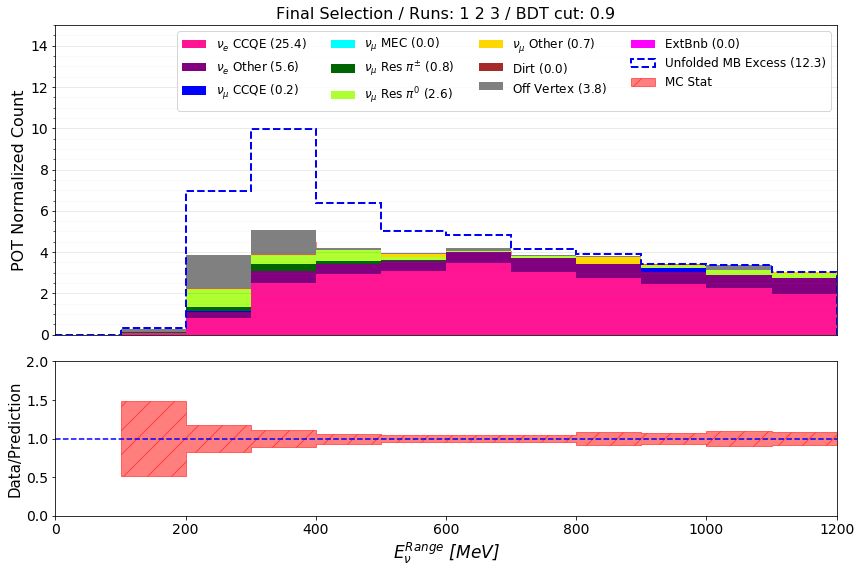

<Figure size 432x288 with 0 Axes>

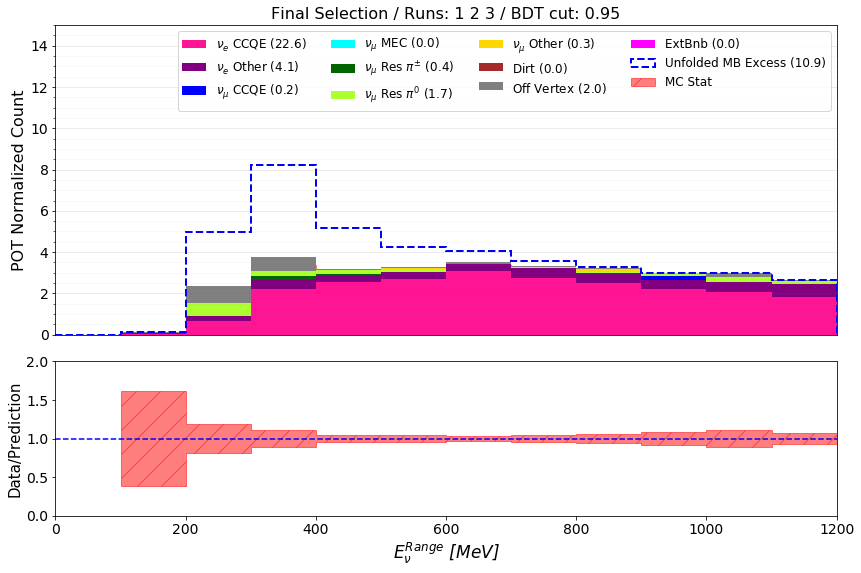

<Figure size 432x288 with 0 Axes>

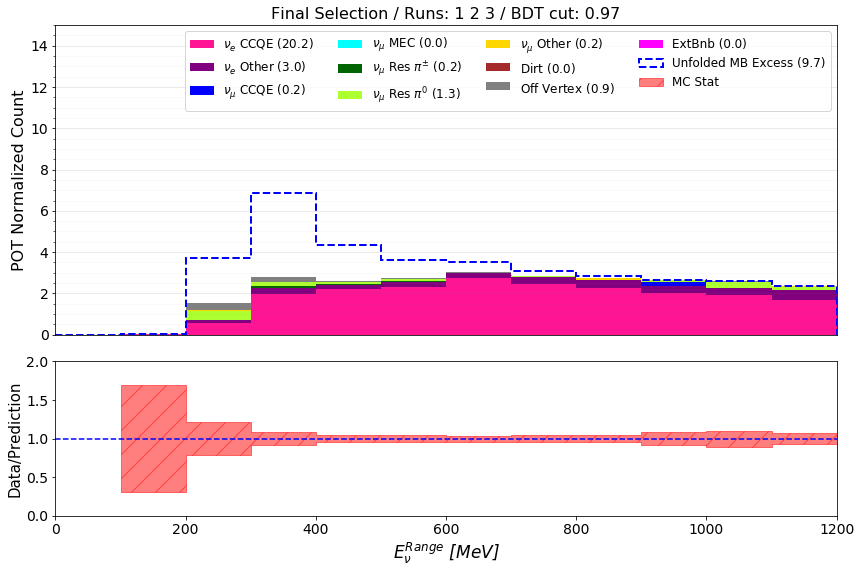

<Figure size 432x288 with 0 Axes>

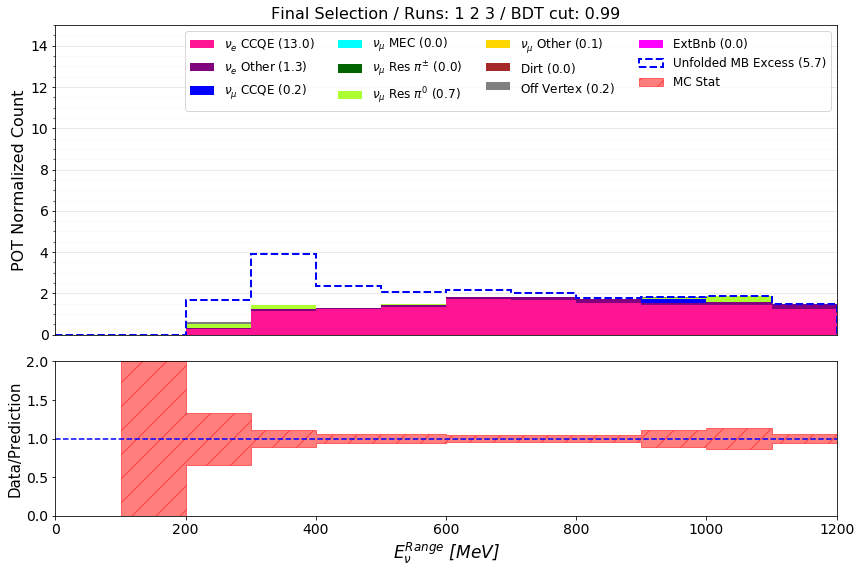

<Figure size 432x288 with 0 Axes>

In [6]:
verbose = False
sys     = False
plotPurity = False
bdtmode = 'fracweight'
nBDTs = 20
bdtpower = 0
bdtcutRange = [0.8,0.9,0.95,0.97,0.99]
runs_to_plot = [#[1],
                #[2],
                #[3],
                [1,2,3]]

POTdict = {1:{ft:DAT_POT1 for ft in filetaglist[1]},
           2:{ft:DAT_POT2 for ft in filetaglist[2]},
           3:{ft:DAT_POT3 for ft in filetaglist[3]}}
POTdict[3]['ext'] = DAT_POT2 + DAT_POT3


for varName in varb_names:


    
    if varName not in ['Enu_1e1p']: continue
    
        
    xlab = varlabel_dict[varName]
        
    bins  = 12 if varName in ['Enu_1e1p'] else 10
    low   = (range_dict[varName])[0]
    high  = (range_dict[varName])[1]
    
    
    
    for runs_included in runs_to_plot: # [run 1, run 2 run 3]
        
        for cut in bdtcutRange:

            if fset in range(1,6): plotTitle = 'Fake Dataset '+str(fset)+' / Runs:'
            elif cutMode==0: plotTitle = 'Final Selection / Runs:'
            elif cutMode==1: plotTitle = 'Loose Kinematic Cuts / Runs:'
            elif cutMode==2: plotTitle = 'High Energy Sideband / Runs:'
            elif cutMode==3: plotTitle = 'Low BDT Sideband / Runs:'
            plotFileName = varName
            FullPOT = 0
            POT1 = 0
            POT23 = 0

            vars_arr = []
            weights_arr = []
            labels_arr = []
            leew_arr = []

            for r in runs_included:
                plotTitle += ' %i'%r
                plotFileName += '_%i'%r
                FullPOT += POTdict[r]['overlay']
                if r == 1: POT1 += POTdict[r]['overlay']
                elif r in [2,3]: POT23 += POTdict[r]['overlay']

                for filetag in filetaglist[r]:
                    if not lowEpatch and 'lowE' in filetag: continue
                    dfc = df[r][filetag].copy()
                    MakeBDTcut(dfc,cut,bdtmode,nBDTs)

                    vars_arr += list(dfc[varName])
                    numu_l = np.core.defchararray.find(np.array(dfc['label'],dtype=np.string_),'numu')!=-1
                    labels = np.where(dfc['scedr']<vtxCut,dfc['label'],'offvtx')
                    labels_arr += list(labels)

                    weights = dfc['GenieWeight'] * dfc['POTweight']**(-1) * dfc['bdtweight'] * dfc['sigprob']**bdtpower
                    leeweights = dfc['LEEweight'] * weights

                    weights_arr += list(weights*POTdict[r][filetag])
                    leew_arr += list(leeweights*POTdict[r][filetag])

            datLab = "Data Sample "+str(fset)+" : {:.2e} POT".format(FullPOT)
            plotTitle += r' / BDT cut: '+str(cut)



            ## ------------------------ ##

            label_arr = np.array(labels_arr)
            var_arr = np.array(vars_arr)
            weight_arr = np.array(weights_arr)

            nueO = list(var_arr[label_arr=='nue_ccqe'])
            nue = list(var_arr[label_arr=='nue_other'])
            ccqe = list(var_arr[label_arr=='numu_ccqe'])
            mec = list(var_arr[label_arr=='numu_mec'])
            pipm = list(var_arr[label_arr=='numu_pipm'])
            pi0 = list(var_arr[label_arr=='numu_pi0'])
            other = list(var_arr[label_arr=='numu_other'])
            dirtVar = []
            offv = list(var_arr[label_arr=='offvtx'])
            extVar = list(var_arr[label_arr=='EXTBNB'])
            lee = list(var_arr)

            ovrw1 = list(weight_arr[label_arr=='numu_ccqe'])
            ovrw2 = list(weight_arr[label_arr=='numu_mec'])
            ovrw3 = list(weight_arr[label_arr=='numu_pipm'])
            ovrw4 = list(weight_arr[label_arr=='numu_pi0'])
            ovrw5 = list(weight_arr[label_arr=='numu_other'])
            ovrw6 = list(weight_arr[label_arr=='offvtx'])
            ovrw7 = list(weight_arr[label_arr=='nue_other'])
            ovrw8 = list(weight_arr[label_arr=='nue_ccqe'])
            dirtw = []
            extw = list(weight_arr[label_arr=='EXTBNB'])
            leew = leew_arr

            d      = plt.hist(nueO,bins=bins,range=(low,high),normed=0)
            xbins  = [(d[1][i]+d[1][i+1])/2.0 for i in range(len(d[1])-1)]
            xbin_edges = d[1]
            binwid = d[1][0]-d[1][1]
            plt.clf()



            wghs = [[x for x in ovrw8],
                    [x for x in ovrw7],
                    [x for x in ovrw1],
                    [x for x in  ovrw2],
                    [x for x in ovrw3],
                    [x for x in  ovrw4],
                    [x for x in ovrw5],
                    [x for x in dirtw],
                    [x for x in ovrw6],
                    [x for x in extw],
                    [x for x in leew]]

            mcErW = [[x**2 for x in ovrw8],
                     [x**2 for x in ovrw7],
                     [x**2 for x in ovrw1],
                     [x**2 for x in  ovrw2],
                     [x**2 for x in ovrw3],
                     [x**2 for x in  ovrw4],
                     [x**2 for x in ovrw5],
                     [x**2 for x in dirtw],
                     [x**2 for x in ovrw6],
                     [x**2 for x in extw]]


            r = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar],bins=bins,range=(low,high),stacked='True',normed=0,weights=mcErW)
            nueO_mcErr  = [sqrt(r[0][0][i]- 0) for i in range(bins)]
            nue_mcErr   = [sqrt(r[0][1][i]-r[0][0][i]) for i in range(bins)]
            ccqe_mcErr  = [sqrt(r[0][2][i]-r[0][1][i]) for i in range(bins)]
            mec_mcErr   = [sqrt(r[0][3][i]-r[0][2][i]) for i in range(bins)]
            pipm_mcErr  = [sqrt(r[0][4][i]-r[0][3][i]) for i in range(bins)]
            pi0_mcErr   = [sqrt(r[0][5][i]-r[0][4][i]) for i in range(bins)]
            other_mcErr = [sqrt(r[0][6][i]-r[0][5][i]) for i in range(bins)]
            dirt_mcErr  = [sqrt(r[0][7][i]-r[0][6][i]) for i in range(bins)]
            offv_mcErr  = [sqrt(r[0][8][i]-r[0][7][i]) for i in range(bins)]
            ext_mcErr   = [sqrt(r[0][9][i]-r[0][8][i]) for i in range(bins)]
            stkerr =  [sqrt( 
                       nueO_mcErr[i]**2  + 
                       nue_mcErr[i]**2  + 
                       ccqe_mcErr[i]**2  + 
                       mec_mcErr[i]**2  + 
                       pipm_mcErr[i]**2  + 
                       pi0_mcErr[i]**2  + 
                       other_mcErr[i]**2  + 
                       dirt_mcErr[i]**2 + 
                       offv_mcErr[i]**2 +  
                       ext_mcErr[i]**2 )
                       for i in range(bins) 
                      ]
            stkerr = np.array(stkerr)
            bkgErr = [sqrt(  
                       nue_mcErr[i]**2  + 
                       ccqe_mcErr[i]**2  + 
                       mec_mcErr[i]**2  + 
                       pipm_mcErr[i]**2  + 
                       pi0_mcErr[i]**2  + 
                       other_mcErr[i]**2  + 
                       dirt_mcErr[i]**2 + 
                       offv_mcErr[i]**2 +  
                       ext_mcErr[i]**2 )
                       for i in range(bins) 
                      ]


            if(verbose):
                print(nueO_mcErr)
                print(stkerr)
                print(bkgErr)

            plt.clf()

            pli = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar,lee],bins=bins,range=(low,high),weights=wghs,stacked='True',normed=0)
            plt.clf()

            nums = [sum(x for x in pli[0][0]           ),
                    sum(x for x in pli[0][1] -pli[0][0]),
                    sum(x for x in pli[0][2] -pli[0][1]),
                    sum(x for x in pli[0][3] -pli[0][2]),
                    sum(x for x in pli[0][4] -pli[0][3]),
                    sum(x for x in pli[0][5] -pli[0][4]),
                    sum(x for x in pli[0][6] -pli[0][5]),
                    sum(x for x in pli[0][7] -pli[0][6]),
                    sum(x for x in pli[0][8] -pli[0][7]),
                    sum(x for x in pli[0][9] -pli[0][8]),        
                    sum(x for x in pli[0][10]-pli[0][9])
                    ]


            cls  = ['deeppink','purple','blue','cyan','darkgreen','greenyellow','gold','brown','gray','fuchsia']
            labs = [r'$\nu_e^{ }$ CCQE (%.1f)'%nums[0],
                    r'$\nu_e^{ }$ Other (%.1f)'%nums[1],
                    r"$\nu_\mu^{ }$ CCQE (%.1f)"%nums[2],
                    r"$\nu_\mu$ MEC (%.1f)"%nums[3],
                    r"$\nu_\mu$ Res $\pi^{\pm}$ (%.1f)"%nums[4],
                    r"$\nu_\mu$ Res $\pi^0$ (%.1f)"%nums[5],
                    r"$\nu_\mu^{ }$ Other (%.1f)"%nums[6],
                    r"Dirt$_{ }^{ }$ (%.1f)"%nums[7],
                    r"Off Vertex$_{ }^{ }$ (%.1f)"%nums[8],
                    "ExtBnb (%.1f)"%nums[9]]

            ## ----------------------- ##


            fig, ax = plt.subplots(figsize=(14,9.5))
            plt.subplot2grid((100,100),(0,0),colspan=100,rowspan=60)

            p = plt.hist([nueO,nue,ccqe,mec,pipm,pi0,other,dirtVar,offv,extVar],bins=bins,range=(low,high),weights=wghs[0:-1],stacked='True',color=cls,label=labs,normed=0)
            pl =plt.hist(nueO+nue+ccqe+mec+pipm+pi0+other+dirtVar+offv+extVar+lee,bins=bins,range=(low,high),weights=wghs[0]+wghs[1]+wghs[2]+wghs[3]+wghs[4]+wghs[5]+wghs[6]+wghs[7]+wghs[8]+wghs[9]+wghs[10],stacked='False',histtype='step',lw=2,color='blue',ls='--',label="Unfolded MB Excess (%.1f)"%nums[10])
            ylow  = 0
            #yhigh = 2.0*max(p[0][-1])
            yhigh = 5*len(runs_included)
            plt.title(plotTitle,fontsize=16)

            major_xticks = arange(low, high*1.01, 20)
            minor_xticks = arange(low, high*1.01, 5)
            major_yticks = arange(ylow, yhigh+1, 50)
            minor_yticks = arange(ylow, yhigh+1, 10)




            if(sys):
                rwt_sys_m,det_sys_m = getSysErrors(bins,varName,POT1,POT23)
                sys_label = 'Full Systematics + MC Stat'
            else:
                rwt_sys_m = np.zeros((bins,bins))
                det_sys_m = np.zeros((bins,bins))
                sys_label = 'MC Stat'
            rwt_sys = np.array([rwt_sys_m[j][j] for j in range(bins)])
            det_sys = np.array([det_sys_m[j][j] for j in range(bins)])
            sys_errs = np.sqrt(rwt_sys + det_sys + stkerr**2/p[0][-1]**2)

            sys_low = np.append((p[0][-1] * (1 - sys_errs)),0)
            rsys_low = np.append(1-sys_errs,0)
            sys_high = np.append((p[0][-1] * (1 + sys_errs)),0)
            rsys_high = np.append(1+sys_errs,0)
            plt.fill_between(xbin_edges,sys_low,sys_low,step='post',hatch='/',label=sys_label,color='red',edgecolor='black',alpha=0.5)


            plt.legend(loc='upper right',fontsize=12,ncol=4)
            plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.17)
            plt.minorticks_on()
            plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.07)
            plt.yticks(fontsize=14)
            ax.set_yticks(major_yticks)
            ax.set_yticks(minor_yticks,minor=True)
            plt.xticks([])
            plt.ylim((ylow,yhigh))
            plt.xlim((low,high))
            #plt.semilogy()
            plt.ylabel("POT Normalized Count",fontsize=16)

            plt.subplot2grid((100,100),(65,0),colspan=100,rowspan=30)

            plt.fill_between(xbin_edges,rsys_low,rsys_high,step='post',hatch='/',label=sys_label,color='red',edgecolor='black',alpha=0.5)
            plt.axhline(y=1.0,ls='--',color='blue')
            plt.xlabel(xlab,fontsize=17,style='italic')
            plt.ylabel("Data/Prediction",fontsize=15)
            plt.ylim((0,2))
            plt.xlim((low,high))
            plt.xticks(fontsize=14)
            plt.yticks(fontsize=14)
            ax.set_xticks(major_xticks)
            ax.set_xticks(minor_xticks,minor=True)

            #plt.savefig('/home/nwkamp/Research/MicroBooNE/1e1pSelectionPrime/BDT/Plots/'+tag+'/'+plotFileName+'_cutLevel'+str(cut)+'.png')
            plt.show()
            plt.clf()

            sig = p[0][0]
            bkg = p[0][-1] - p[0][0]

            if plotPurity:
                purityRat = sig / (sig+bkg)
                pratErr = np.sqrt((1.0/(sig+bkg))**2*np.array(nueO_mcErr)**2 +
                                 (sig/(sig+bkg)**2)**2*np.array(stkerr)**2)
                pratErr = np.where(np.logical_or(np.isinf(purityRat),np.isnan(purityRat)),1,pratErr)
                purityRat = np.where(np.logical_or(np.isinf(purityRat),np.isnan(purityRat)),1,purityRat)
                pRatDict[str(cut)] = purityRat
                pErrDict[str(cut)] = pratErr


        if plotPurity:
            fig, ax = plt.subplots(figsize=(10,7))
            ymin = 1
            for k in cutRange:
                k = str(k)
                purityRat = pRatDict[k]
                pratErr = pErrDict[k]
                label = pLabelDict[k]
                lowSide = purityRat - pratErr
                if min(lowSide)<ymin: ymin = min(lowSide)
                plt.errorbar(xbins,purityRat,yerr=pratErr,fmt='.',capsize=3,label=label)
            plt.xlabel(xlab)
            plt.legend(loc='lower right',fontsize=15,ncol=1)
            plt.ylim(0,1)
            plt.ylabel(r'$\frac{sig}{sig + bkg}$',fontsize=15)
            #plt.semilogy()
            #plt.savefig('Plots/GenieV'+str(GENIE_tune)+'/'+savedir+'/'+plotFileName+'_pRat.png')

            plt.show()
            plt.clf()